In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
headers = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
dataset = pd.read_csv("iris.data", encoding = "ISO-8859-1", decimal=",", header=None, names=headers)

In [3]:
dataset

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
for col in  dataset.columns[0:4]:
    dataset[col] = dataset[col].astype(float)

In [5]:
dataset.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

In [6]:
X = dataset.iloc[:, 0:4]
y = dataset.iloc[:, 4]

In [7]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [9]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
X_clustered = kmeans.fit_predict(X)

In [10]:
X_clustered

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [11]:
results = dataset[['class']].copy()
results['clusterNumber'] = X_clustered
results

,class,clusterNumber
0,Iris-setosa,1
1,Iris-setosa,1
2,Iris-setosa,1
3,Iris-setosa,1
4,Iris-setosa,1
...,...,...
145,Iris-virginica,2
146,Iris-virginica,0
147,Iris-virginica,2
148,Iris-virginica,2


In [12]:
LABEL_COLOR_MAP = {0 : 'red', 1 : 'blue', 2: 'green'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

In [13]:
c1 = 0 # valor do índice da coluna, pode ser 0, 1 ou 2
c2 = 1
labels = ['sepal length', 'sepal width', 'petal length']
c1label = labels[c1]
c2label = labels[c2]
title = "Gráficos"

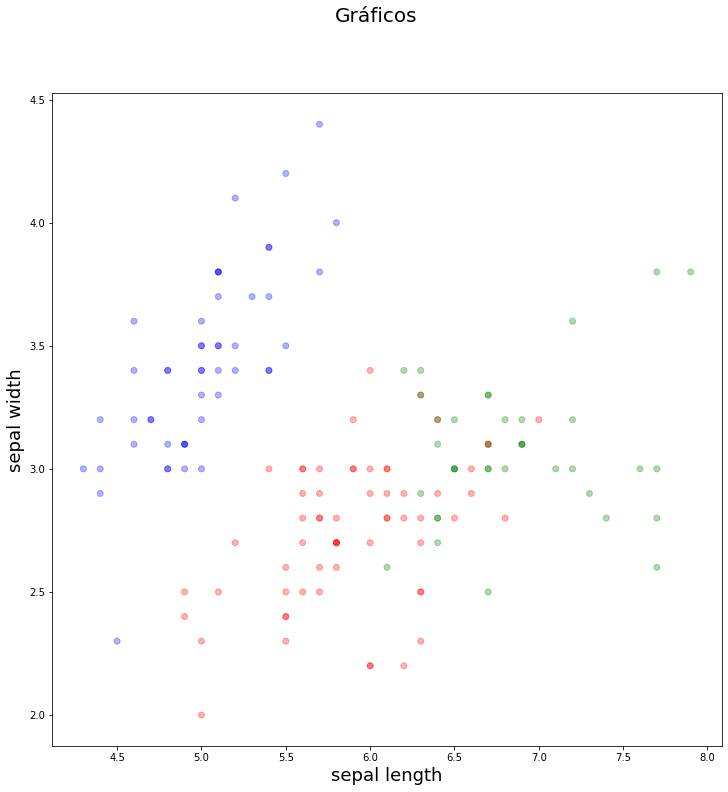

In [14]:
plt.figure(figsize = (12,12))
plt.scatter(X.iloc[:, c1],X.iloc[:, c2], c=label_color, alpha=0.3) 
plt.xlabel(c1label, fontsize=18)
plt.ylabel(c2label, fontsize=18)
plt.suptitle(title, fontsize=20)
plt.savefig(title + '.jpg')
plt.show()